## Importing all the required libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing as sk_preprocessing
from sklearn.model_selection import train_test_split

## Reading the data into DataFrame called DF

In [100]:
df = pd.read_csv("/Users/shekhara/Downloads/seed_data.txt", sep= '\t', header=None, on_bad_lines='skip', names=["Area", "Perimeter", "Compactness", "Length of Kernel", "Width of Kernel", "Asymetry Coefficient", "Length of Kernel groove","Class"])
#skipped the lines with missing values using the parameter on_bad_lines='skip'

In [101]:
df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymetry Coefficient,Length of Kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [102]:
df.shape

(199, 8)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

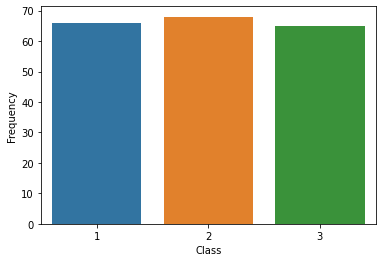

In [104]:
#plot frequency of class
ax = sns.countplot(df["Class"])
plt.xlabel('Class')
plt.ylabel('Frequency')

## Setting class as the target value 


In [105]:
Y = df['Class']
X = df.drop('Class', axis = 1)

In [121]:
#Split the data based on Label
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 2.15/7, stratify = Y)  

In [122]:
#Almost 60 in Trainging set
X_train.shape

(137, 7)

In [123]:
#150 in Testing set
X_test.shape

(62, 7)

In [124]:
#scaling data
scaler = sk_preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
#Implementing SVM model
svc = SVC()
svc.fit(X_train, Y_train.values.ravel())
Y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[19  0  2]
 [ 1 20  0]
 [ 2  0 18]]
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        21
           2       1.00      0.95      0.98        21
           3       0.90      0.90      0.90        20

    accuracy                           0.92        62
   macro avg       0.92      0.92      0.92        62
weighted avg       0.92      0.92      0.92        62



In [ ]:
#Accuracy of 92% and testing error is 8%